## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [2]:
#Importing important modules
from __future__ import absolute_import, division, print_function
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import skimage.io as io

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.listdir('.')

['.config', 'drive', 'sample_data']

In [0]:
os.chdir('/content/drive/My Drive/CNN/CNN_Project')

In [0]:
import numpy as np
import pandas as pd

### Load Dataset Files

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/CNN/CNN_Project/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
#from zipfile import ZipFile
#with ZipFile('/content/drive/My Drive/CNN/CNN_Project/train.zip', 'r') as z:
 # z.extractall()

Repeat the same step for test.zip

In [0]:
#from zipfile import ZipFile
#with ZipFile('/content/drive/My Drive/CNN/CNN_Project/test.zip', 'r') as z:
 # z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
#from zipfile import ZipFile
#with ZipFile('/content/drive/My Drive/CNN/CNN_Project/sample_submission.csv.zip', 'r') as z:
 # z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
#from zipfile import ZipFile
#with ZipFile('/content/drive/My Drive/CNN/CNN_Project/labels.csv.zip', 'r') as z:
 # z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
label=pd.read_csv("/content/drive/My Drive/CNN/CNN_Project/labels.csv")

In [13]:
label.shape

(10222, 2)

In [0]:
label=label.head(2500)

In [15]:
label.dtypes

id       object
breed    object
dtype: object

### Print the count of each category of Dogs given in the dataset



In [16]:
label['breed'].value_counts()

bedlington_terrier             35
lakeland_terrier               30
basenji                        30
samoyed                        30
whippet                        28
                               ..
doberman                       14
german_shepherd                13
staffordshire_bullterrier      13
briard                         12
soft-coated_wheaten_terrier    12
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
dum = pd.get_dummies(label['breed'])

In [18]:
Y=dum
print(Y.shape)

(2500, 120)


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [19]:
img_rows = 128
img_cols = 128

from tqdm import tqdm
import cv2
x_train_feature = []
y_train_feature = []
f = 0 # initialisation

for f,img in tqdm(label.values): # f for format ,jpg
    train_img = cv2.imread('./train/{}.jpg'.format(f), 1)
    try:
      train_img_resize = cv2.resize(train_img, (img_rows, img_cols))
    except cv2.error as e:
      print('Invalid frame!')    
    x_train_feature.append(train_img_resize)
    y_train_feature.append(img)

  4%|▍         | 100/2500 [00:00<00:17, 138.52it/s]

Invalid frame!


 73%|███████▎  | 1820/2500 [00:13<00:04, 146.63it/s]

Invalid frame!


100%|██████████| 2500/2500 [00:18<00:00, 137.96it/s]


In [20]:
x_train_feature[0].shape

(128, 128, 3)

In [21]:
y_train_feature[0]

'boston_bull'

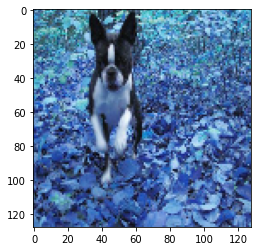

In [22]:
plt.imshow(x_train_feature[0])
plt.show()

In [23]:
xtrain=np.array(x_train_feature)
print(xtrain.shape)

(2500, 128, 128, 3)


In [24]:
ytrain=np.array(y_train_feature)
print(ytrain.shape)

(2500,)


Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
X_train = xtrain.astype('float32')
X_train /= 255

In [0]:
x_train = X_train.reshape(X_train.shape[0],128,128,3)

In [27]:
x_train.shape

(2500, 128, 128, 3)

In [28]:
np.unique(ytrain)

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [0]:
y_train = pd.get_dummies(ytrain)

In [30]:
y_train.shape

(2500, 120)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
x_train1, x_val1, y_train1, y_val1 = train_test_split(x_train, y_train, test_size=0.2, random_state=2)


In [32]:
print (len(x_train1))
print(len(y_train1))
print (len(x_val1))
print(len(y_val1))

2000
2000
500
500


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [33]:
test_img=pd.read_csv("/content/drive/My Drive/CNN/CNN_Project/sample_submission.csv")
test_img.head(2)


,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [34]:
print(test_img.shape)

(10357, 121)


In [35]:
test_img=test_img.head(5000)
test_img.shape

(5000, 121)

Run the below code to load the test image files in x_test_feature

In [36]:
x_test_feature = []
i = 0 # initialisation

for f in tqdm(test_img['id'].values): # f for format ,jpg
    test_img = cv2.imread('./test/{}.jpg'.format(f), 1)    
    try:
      test_img_resize = cv2.resize(test_img, (img_rows, img_cols))
    except cv2.error as e:
      print('Invalid frame!')
    x_test_feature.append(test_img_resize)

100%|██████████| 5000/5000 [00:36<00:00, 136.77it/s]


In [37]:
x_test_feature[0].shape

(128, 128, 3)

In [38]:
x_test=np.array(x_test_feature)
x_test.shape

(5000, 128, 128, 3)

Normalize the test data and convert it into 4 dimensions

In [0]:
X_test = x_test.astype('float32')
X_test /= 255

In [40]:
xtest = x_test.reshape(x_test.shape[0],128,128,3)
print(xtest.shape)

(5000, 128, 128, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
TRAIN = False
BATCH_SIZE = 128
EPOCHS = 10

In [42]:
    # Define model
    model1 = Sequential()

    # 1st Conv Layer
    model1.add(Convolution2D(32, 5, 5, input_shape=(128, 128, 3)))
    model1.add(Activation('relu'))

    # 2nd Conv Layer
    model1.add(Convolution2D(32, 3, 3))
    model1.add(Activation('relu'))

    # Fully Connected Layer
    model1.add(Flatten())
    model1.add(Dense(256))
    model1.add(Activation('relu'))

    # Prediction Layer
    model1.add(Dense(120))
    model1.add(Activation('softmax'))

    # Loss and Optimizer
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model1.fit(x_train1, y_train1, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_val1, y_val1), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(128, 128,...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 2000 samples, validate on 500 samples
Epoch 1/10
2000/2000 [==============================] - 67s 34ms/step - loss: 9.6011 - accuracy: 0.0090 - val_loss: 4.7996 - val_accuracy: 0.0060
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


2000/2000 [==============================] - 67s 33ms/step - loss: 4.7156 - accuracy: 0.0440 - val_loss: 4.8023 - val_accuracy: 0.0100
Epoch 3/10
2000/2000 [==============================] - 66s 33ms/step - loss: 4.2676 - accuracy: 0.1580 - val_loss: 4.8998 - val_accuracy: 0.0160
Epoch 4/10
2000/2000 [==============================] - 64s 32ms/step - loss: 2.8541 - accuracy: 0.5025 - val_loss: 5.1242 - val_accuracy: 0.0160
Epoch 5/10
2000/2000 [==============================] - 65s 32ms/step - loss: 1.0065 - accuracy: 0.8585 - val_loss: 5.7045 - val_accuracy: 0.0300
Epoch 6/10
2000/2000 [==============================] - 65s 32ms/step - loss: 0.2359 - accuracy: 0.9720 - val_loss: 6.4623 - val_accuracy: 0.0240
Epoch 7/10
2000/2000 [==============================] - 65s 32ms/step - loss: 0.0576 - accuracy: 0.9955 - val_loss: 7.0236 - val_accuracy: 0.0200
Epoch 8/10
2000/2000 [==============================] - 65s 32ms/step - loss: 0.0326 - accuracy: 0.9970 - val_loss: 6.9685 - val_accura

### Use batch_size = 128 and epochs = 10 and execute the model

In [43]:
loss_and_metrics = model1.evaluate(x_val1, y_val1)
print(loss_and_metrics)

500/500 [==============================] - 4s 8ms/step
[6.7314352073669435, 0.024000000208616257]


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

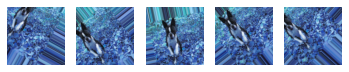

In [47]:
train_generator = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(train_generator.next().squeeze(), cmap='gray')
    plt.plot()

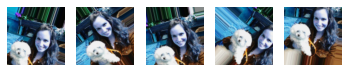

In [48]:
val_generator = datagen.flow(x_val1[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(val_generator.next().squeeze(), cmap='gray')
    plt.plot()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [49]:
model1.fit_generator(datagen.flow(x_train1, y_train1,batch_size=128),
                    samples_per_epoch=x_train1.shape[0],
                    nb_epoch=10,
                    validation_data=(x_val1, y_val1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., steps_per_epoch=15, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10
15/15 [==============================] - 64s 4s/step - loss: 4.9190 - accuracy: 0.0176 - val_loss: 4.7872 - val_accuracy: 0.0120
Epoch 2/10
15/15 [==============================] - 65s 4s/step - loss: 4.7774 - accuracy: 0.0161 - val_loss: 4.7890 - val_accuracy: 0.0180
Epoch 3/10
15/15 [==============================] - 62s 4s/step - loss: 4.7603 - accuracy: 0.0192 - val_loss: 4.8135 - val_accuracy: 0.0060
Epoch 4/10
15/15 [==============================] - 63s 4s/step - loss: 4.7349 - accuracy: 0.0208 - val_loss: 4.8454 - val_accuracy: 0.0160
Epoch 5/10
15/15 [==============================] - 65s 4s/step - loss: 4.7338 - accuracy: 0.0188 - val_loss: 4.8562 - val_accuracy: 0.0060
Epoch 6/10
15/15 [==============================] - 63s 4s/step - loss: 4.7102 - accuracy: 0.0182 - val_loss: 4.8839 - val_accuracy: 0.0120
Epoch 7/10
15/15 [==============================] - 64s 4s/step - loss: 4.6757 - accuracy: 0.0236 - val_loss: 4.9829 - val_accuracy: 0.0080
Epoch 8/10
15/15 [==

In [50]:
loss_and_metrics = model1.evaluate(x_val1, y_val1)
print(loss_and_metrics)

500/500 [==============================] - 4s 8ms/step
[4.960173217773438, 0.012000000104308128]


# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg',input_shape = (128,128,3))

Print the summary of the base_model

In [53]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
base_model_2=Sequential()

base_model_2.add(base_model)
# Fully Connected Layer 1
#base_model_2.add(Flatten())
base_model_2.add(Dense(1024))
base_model_2.add(Activation('relu'))

    #Layer 2
base_model_2.add(Dense(256))
base_model_2.add(Activation('relu'))

# Prediction Layer
base_model_2.add(Dense(120))
base_model_2.add(Activation('softmax'))

# Loss and Optimizer
base_model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers[:20]:
    layer.trainable = False

In [56]:
for layer in base_model.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f8940980588> False
<keras.layers.convolutional.Conv2D object at 0x7f89409803c8> False
<keras.layers.convolutional.Conv2D object at 0x7f8940980860> False
<keras.layers.pooling.MaxPooling2D object at 0x7f89408796d8> False
<keras.layers.convolutional.Conv2D object at 0x7f8940879898> False
<keras.layers.convolutional.Conv2D object at 0x7f8940899f60> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8940862b00> False
<keras.layers.convolutional.Conv2D object at 0x7f8940862940> False
<keras.layers.convolutional.Conv2D object at 0x7f894182ad30> False
<keras.layers.convolutional.Conv2D object at 0x7f894182ae10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f894182db38> False
<keras.layers.convolutional.Conv2D object at 0x7f894182d978> False
<keras.layers.convolutional.Conv2D object at 0x7f8941834668> False
<keras.layers.convolutional.Conv2D object at 0x7f8941834e10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8941836c88>

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [59]:
# Train the base_model_2
    Output1=base_model_2.fit(x_train1, y_train1, batch_size=128, nb_epoch=10, 
              validation_data=(x_val1, y_val1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 2000 samples, validate on 500 samples
Epoch 1/10
2000/2000 [==============================] - 663s 331ms/step - loss: 5.0651 - accuracy: 0.0095 - val_loss: 4.7924 - val_accuracy: 0.0040
Epoch 2/10
2000/2000 [==============================] - 656s 328ms/step - loss: 4.7868 - accuracy: 0.0090 - val_loss: 4.7926 - val_accuracy: 0.0080
Epoch 3/10
2000/2000 [==============================] - 655s 327ms/step - loss: 4.7776 - accuracy: 0.0155 - val_loss: 4.7947 - val_accuracy: 0.0080
Epoch 4/10
2000/2000 [==============================] - 657s 329ms/step - loss: 4.7748 - accuracy: 0.0155 - val_loss: 4.7994 - val_accuracy: 0.0080
Epoch 5/10
2000/2000 [==============================] - 658s 329ms/step - loss: 4.7727 - accuracy: 0.0135 - val_loss: 4.7921 - val_accuracy: 0.0040
Epoch 6/10
2000/2000 [==============================] - 660s 330ms/step - loss: 4.7734 - accuracy: 0.0165 - val_loss: 4.8186 - val_accuracy: 0.0120
Epoch 7/10
2000/2000 [==============================] - 663s 331m

In [60]:
base_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
activation_5 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               30840     
_________________________________________________________________
activation_7 (Activation)    (None, 120)              

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
